# Figures in the Manuscript and the Rebuttal Letter

In [2]:
# import modules
# uncomment it if we use common.ipynb instead of common.py (that is, if we import the notebook as a module)
#import import_ipynb
from common import *
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "sans-serif"

In [3]:
# save figures in the folder
_Figure_PATH_ = './figures/main/'

# Main

## Figure 1

> Pairwise dominance and extortion ability of zero-determinant (ZD) strategies. 

### a & b (original Figure 1)

In [4]:
def s_XY_quad(s_X, s_Y, payoff_subs, chi_sub = 2, fsize = (8, 8), ms = 20, fs = 20):
    '''
    Quadrilateral visualization of the payoffs s_X and s_Y
    s_X: payoff of player X
    s_Y: payoff of player Y
    payoff_subs: values of the four payoffs R, S, T, and P
    chi_sub: value of the extortion factor chi
    fsize: figure size
    ms: marker size
    fs: font size
    '''
    # use a different color scheme
    prop_cycle = plt.rcParams['axes.prop_cycle'] 
    colors = prop_cycle.by_key()['color']
    s_X_temp = cancel(s_X.subs(phi, 1/((T - S)*chi + (T - S))).subs(chi, chi_sub))
    s_Y_temp = cancel(s_Y.subs(phi, 1/((T - S)*chi + (T - S))).subs(chi, chi_sub))
    O_subs = [(O, P), (O, (R + P)/2), (O, R)]
    rr, ss = payoff_subs[0][1], payoff_subs[1][1]
    tt, pp = payoff_subs[2][1], payoff_subs[3][1]
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    fig.patch.set_facecolor('white')
    k = 2 # color code
    # the linear relation s_X - O = chi (s_Y - O)
    if 2*payoff_subs[3][1] < payoff_subs[1][1] + payoff_subs[2][1]:
        q_1_subs = np.concatenate((np.linspace(0, 0.9, 10), np.linspace(0.92, 1, 5)))
        q_2_subs = np.linspace(0, 1, 11)
        q_3_subs = np.concatenate((np.linspace(0, 0.1, 6), np.linspace(0.2, 1, 9)))
        q_4_subs = np.concatenate((np.linspace(0, 0.1, 6), np.linspace(0.2, 1, 9)))
    elif 2*payoff_subs[3][1] > payoff_subs[1][1] + payoff_subs[2][1]:
        q_1_subs = np.concatenate((np.linspace(0, 0.9, 10), np.linspace(0.92, 1, 5)))
        q_2_subs = np.concatenate((np.linspace(0, 0.9, 10), np.linspace(0.92, 1, 5)))
        q_3_subs = np.concatenate((np.linspace(0, 0.1, 6), np.linspace(0.2, 1, 9)))
        q_4_subs = np.concatenate((np.linspace(0, 0.01, 6), np.linspace(0.02, 0.1, 5), np.linspace(0.2, 1, 9)))
    for i, O_sub in enumerate(O_subs):
        lam_s_X = lambdify([q_1, q_2, q_3, q_4], cancel(s_X_temp.subs([O_sub] + payoff_subs)))
        lam_s_Y = lambdify([q_1, q_2, q_3, q_4], cancel(s_Y_temp.subs([O_sub] + payoff_subs)))
        for q_1_sub in q_1_subs:
            for q_2_sub in q_2_subs:
                for q_3_sub in q_3_subs:
                    x_values = lam_s_X(q_1_sub, q_2_sub, q_3_sub, q_4_subs)
                    y_values = lam_s_Y(q_1_sub, q_2_sub, q_3_sub, q_4_subs)
                    cc = [colors[3] if x < y else colors[0] for x, y in zip(x_values, y_values)]
                    plt.scatter(x_values, y_values, c = cc, marker = 'o', s = ms/5, alpha = 0.05)
    
    # the points
    plt.plot(ss, tt, c = colors[k], marker = '.', markersize = ms)
    plt.plot(tt, ss, c = colors[k], marker = '.', markersize = ms)
    plt.plot((rr + pp)/2, (rr + pp)/2, c = colors[k], marker = '.', markersize = ms)
    plt.text(ss + 0.5, tt - 0.2, r'$(S, T)$', fontsize = fs - 2)
    plt.text(tt - 1, ss, r'$(T, S)$', fontsize = fs - 2)
    plt.text(rr + 0.1, rr + 0.1, r'$(R, R)$', fontsize = fs - 2)
    plt.text(pp - 0.4, pp - 0.4, r'$(P, P)$', fontsize = fs - 2)
    # the quadrilateral
    points = [[ss, tt], [rr, rr], [tt, ss], [pp, pp]]
    polygon = plt.Polygon(points, color = colors[k], ec = None, alpha = 0.2)
    ax.add_patch(polygon)
    # the line pointing from (R, R) to (P, P)
    line_0 = plt.Line2D((rr, pp), (rr, pp), c = colors[k], lw = 2, ls = '--', marker = '.', 
                         markersize = ms, alpha = 1)
    ax.add_line(line_0)
    # the line pointing from (S, T) to (T, S)
    if 2*payoff_subs[3][1] > payoff_subs[1][1] + payoff_subs[2][1]:
        line_1 = plt.Line2D((ss, tt), (tt, ss), c = colors[k], lw = 2, ls = '--', marker = '.', 
                            markersize = ms, alpha = 1)
        ax.add_line(line_1)
    # legends
    legend_elements = [plt.Line2D([0], [0], color = colors[0], lw = 4, label = r'$s_X > s_Y$'),
                       plt.Line2D([0], [0], color = colors[3], lw = 4, label = r'$s_X < s_Y$')]
    
    plt.legend(handles = legend_elements, loc = (lambda x: 'upper right' if x else 'lower left')(2*payoff_subs[3][1] < payoff_subs[1][1] + payoff_subs[2][1]),  
               fancybox = True, fontsize = fs - 2)
    # equalize the scales of x-axis and y-axis
    ax.set_aspect('equal', adjustable = 'box')
    ax.set_xlabel('Payoff of extortioner, ' + r'$s_X$', fontsize = fs - 2)
    ax.set_ylabel('Payoff of coplayer, ' + r'$s_Y$', fontsize = fs - 2)
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs - 4)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs - 4)
    
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    plt.title(r'$(R, S, T, P) = ($' + title + r'$)$' + '\n' + r'$\chi = $' + str(chi_sub), fontsize = fs)
    
    if 2*payoff_subs[3][1] < payoff_subs[1][1] + payoff_subs[2][1]:
        plt.savefig(_Figure_PATH_ + 'payoff_quad_con.png', dpi = 400, 
                    facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    elif 2*payoff_subs[3][1] > payoff_subs[1][1] + payoff_subs[2][1]:
        plt.savefig(_Figure_PATH_ + 'payoff_quad_abn.png', dpi = 400, 
                    facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    plt.show()

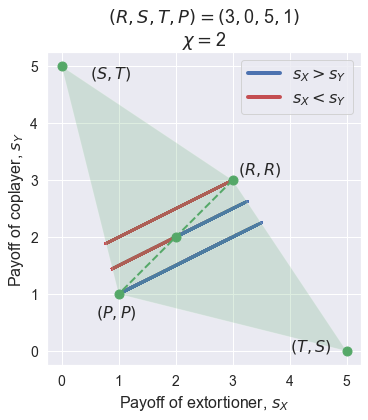

In [5]:
# conventioanl IPD game with T + S > 2P
s_XY_quad(s_X_gen, s_Y_gen, payoff_con_subs, chi_sub = 2, fsize = (6, 6), ms = 18, fs = 18)

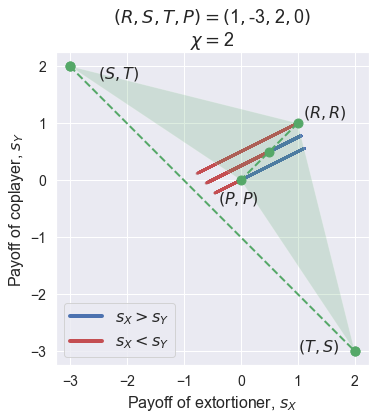

In [6]:
# general IPD game with T + S < 2P
s_XY_quad(s_X_gen, s_Y_gen, payoff_abn_subs, chi_sub = 2, fsize = (6, 6), ms = 18, fs = 18)

### c & d

In [4]:
def extortion_barplot(s_X, payoff_subs, chi_sub = 2, fsize = (8, 8), fs = 20, tag = 'con'):
    '''
    Barplot of the probability of extortion with respect to the basline payoff O
    s_X: payoff of player X
    payoff_subs: values of the four payoffs R, S, T, and P
    chi_sub: value of the extortion factor chi
    fsize: figure size
    fs: font size
    tag: name of the plot (relation between T + S and 2P)
    '''
    prop_cycle = plt.rcParams['axes.prop_cycle'] 
    colors = prop_cycle.by_key()['color']
    
    s_X_temp = cancel(s_X.subs(chi, chi_sub))
    
    m = 10
    O_subs = [(O, ((m - i)*P + i*R)/m) for i in range(m + 1)]
    heights = [0]*len(O_subs)
    error = 1e-3
    
    n = 30
    q_1_subs = np.linspace(0 + error, 1 - error, n)
    q_2_subs = np.linspace(0 + error, 1 - error, n)
    q_3_subs = np.linspace(0 + error, 1 - error, n)
    q_4_subs = np.linspace(0 + error, 1 - error, n)
    
    for i, O_sub in enumerate(O_subs):
        lam_s_X = lambdify([phi, q_1, q_2, q_3, q_4], cancel(s_X_temp.subs([O_sub] + payoff_subs)))
        O_value = O_sub[1].subs(payoff_subs)
        phi_upper_1 = (1/((T - O)*chi + (O - S))).subs([O_sub] + [(chi, chi_sub)] + payoff_subs)
        phi_upper_2 = (1/((O - S)*chi + (T - O))).subs([O_sub] + [(chi, chi_sub)] + payoff_subs)
        phi_upper = min(float(phi_upper_1), float(phi_upper_2))
        phi_subs = np.linspace(0 + error, phi_upper, n)
        count = 0
        for q_1_sub in q_1_subs:
            for q_2_sub in q_2_subs:
                for q_3_sub in q_3_subs:
                    for q_4_sub in q_4_subs:
                        x_values = lam_s_X(phi_subs, q_1_sub, q_2_sub, q_3_sub, q_4_sub)
                        count += sum([1 if x > O_value else 0 for x in x_values]) # decide whether s_X > s_Y
        heights[i] = count/n**5
        
    if (2*payoff_subs[3][1] < payoff_subs[2][1] + payoff_subs[1][1]):
        k = 0
    else:
        k = 3 
        
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    fig.patch.set_facecolor('white')
    bars = (r'$P$', r'$\frac{R + 4P}{5}$', r'$\frac{2R + 3P}{5}$',
            r'$\frac{3R + 2P}{5}$', r'$\frac{4R + P}{5}$', r'$R$')
    
    x_pos = np.arange(len(O_subs))
    plt.bar(x_pos, heights, color = colors[k], alpha = 0.6)
    plt.xticks(x_pos[::int(m/5)], bars)
    
    xt = ax.get_xticks()
    xt = np.append(xt, int(m/2))
    xt_list = xt.tolist()
    xt_list =  [r'$P$', r'$\frac{R + 4P}{5}$', r'$\frac{2R + 3P}{5}$',
                r'$\frac{3R + 2P}{5}$', r'$\frac{4R + P}{5}$', r'$R$'] + [r'$\frac{R + P}{2}$']
    ax.set_xticks(xt)
    ax.set_xticklabels(xt_list)
    
    for i, v in enumerate(heights[::int(m/5)]):
        plt.text(x_pos[::int(m/5)][i] - 0.25, v + 0.01, str(round(v, 3)), color = 'black', fontsize = fs - 6)
    
    plt.text(x_pos[int(m/2)] - 0.25, heights[int(m/2)] + 0.01, str(round(heights[int(m/2)], 3)), color = 'black', fontsize = fs - 6)
    
    ax.set_ylim(0, 1.05)
    ax.set_xlabel('Baseline payoff, ' + r'$O$', fontsize = fs - 2)
    ax.set_ylabel('Probability of successful extortion', fontsize = fs - 2)
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs - 6)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs - 6)
    
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    plt.title(r'$(R, S, T, P) = ($' + title + r'$)$' + '\n' + r'$\chi = $' + str(chi_sub), fontsize = fs)
    
    plt.savefig(_Figure_PATH_ + "extortion_" + tag + '_' + str(chi_sub).replace('.', '_') + ".png", 
                dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none')
    plt.show()

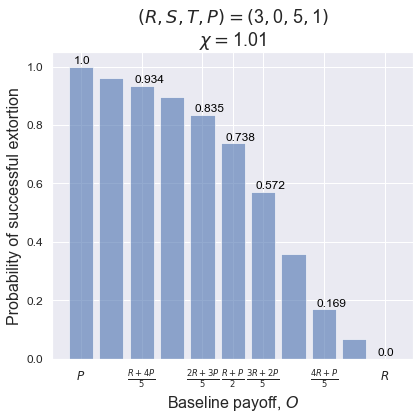

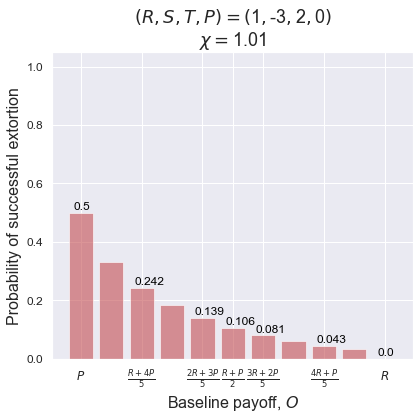

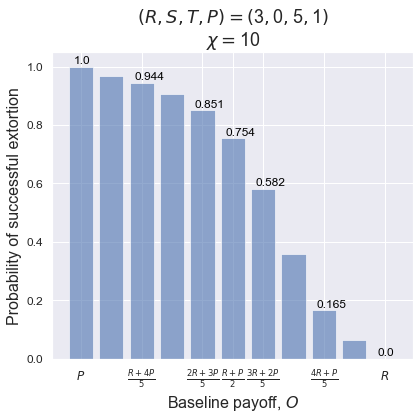

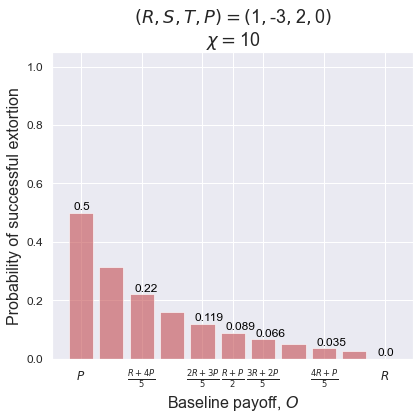

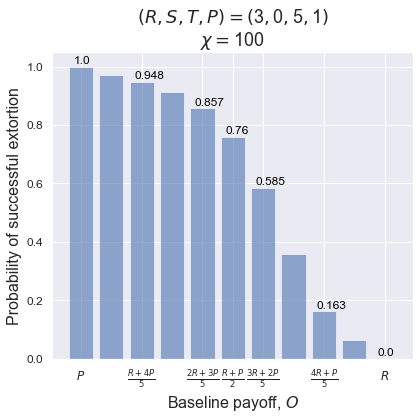

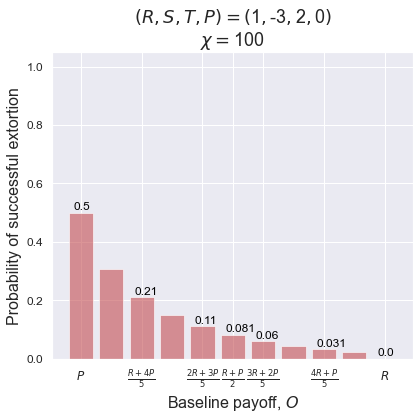

In [6]:
for chi_sub in [2]:
#for chi_sub in [1.01, 10, 100]:
    # conventional IPD game with T + S > 2P
    extortion_barplot(s_X_gen, payoff_con_subs, chi_sub = chi_sub, fsize = (6, 6), fs = 18, tag = 'con')
    # general IPD game with T + S < 2P
    extortion_barplot(s_X_gen, payoff_abn_subs, chi_sub = chi_sub, fsize = (6, 6), fs = 18, tag = 'abn')

## Figure 2

> Impacts of control parameters $(\phi, \chi)$ on the average payoff of a zero-determinant (ZD) player when playing against a fixed co-player.

### partial derivative of $s_X$ wrt $\chi$
#### $q = q_1$

conventional IPD game with $(R, S, T, P) = (3, 0, 5, 1)$ 

* $0 < \phi \leq \frac{1}{4\chi + 1} \leq \frac{1}{5}$, or equivalently, $1 \leq \chi \leq \frac{1 - \phi}{4\phi}$


* $\chi = 1, \frac{\partial s_X}{\partial \chi} > 0$
* $\chi = \frac{1 - \phi}{4\phi}, \frac{\partial s_X}{\partial \chi} \begin{cases} < 0 & \text{small}\, \phi \\ > 0 & \text{large}\, \phi \end{cases}$

> small $\phi$: one-humped, larget $\phi$: no humps


general IPD game with $(R, S, T, P) = (1, -3, 2, 0)$

* $0 < \phi \leq \frac{1}{3\chi + 2} \leq \frac{1}{5}$, or equivalently, $1 \leq \chi \leq \frac{1 - 2\phi}{3\phi}$


* $\chi = 1, \frac{\partial s_X}{\partial \chi} \begin{cases} < 0 & \text{small}\, \phi \\ > 0 & \text{large}\, \phi \end{cases}$
* $\chi = \frac{1 - 2\phi}{3\phi}, \frac{\partial s_X}{\partial \chi} > 0$

> small $\phi$: one-humped, larget $\phi$: no humps

#### $q = q_2$

conventional IPD game with $(R, S, T, P) = (3, 0, 5, 1)$ 

* $\chi = 1, \frac{\partial s_X}{\partial \chi} \begin{cases} < 0 & \text{small}\, \phi \\ > 0 & \text{large}\, \phi \end{cases}$
* $\chi = \frac{1 - \phi}{4\phi}, \frac{\partial s_X}{\partial \chi} > 0$

> small $\phi$: one-humped, larget $\phi$: no humps

general IPD game with $(R, S, T, P) = (1, -3, 2, 0)$

* $\chi = 1, \frac{\partial s_X}{\partial \chi} \begin{cases} > 0 & \text{small}\, \phi \\ < 0 & \text{large}\, \phi \end{cases}$
* $\chi = \frac{1 - 2\phi}{3\phi}, \frac{\partial s_X}{\partial \chi} < 0$

> small $\phi$: one-humped, larget $\phi$: no humps


In [7]:
factor(phi_upper_con.subs(payoff_con_subs)), factor(phi_upper_abn.subs(payoff_abn_subs))
solve(factor(phi_upper_con.subs(payoff_con_subs)) - phi, chi)[0]
solve(factor(phi_upper_abn.subs(payoff_abn_subs)) - phi, chi)[0]
# parabola opening downwards, axis of symmetry > 0
derivative = factor(diff(factor(s_X_ext.subs(payoff_con_subs).subs(q_subs_1)), chi))
# parabola opening upwards, axis of symmetry < 0
derivative = factor(diff(factor(s_X_ext.subs(payoff_abn_subs).subs(q_subs_1)), chi))
# parabola opening upwards, axis of symmetry < 0
derivative = factor(diff(factor(s_X_ext.subs(payoff_con_subs).subs(q_subs_2)), chi))
# parabola opening downwards, axis of symmetry < 0
derivative = factor(diff(factor(s_X_ext.subs(payoff_abn_subs).subs(q_subs_2)), chi))

In [8]:
def s_X_3D(s_X, payoff_subs, phi_upper, q_subs, cmap, fsize = (6, 5), fs = 18, tag = 1):
    '''
    3D surface of the payoff s_X with respect to the extortion factor chi and the parameter phi
    s_X: payoff of player X
    payoff_subs: values of the four payoffs R, S, T, and P
    phi_upper: upper bound of phi
    q_subs: values of the four probabilities q_1, q_2, q_3, q_4 (strategy used by player Y)
    cmap: color map
    fsize: figure size
    fs: font size
    tag: name of the plot
    '''
    lam_phi_upper = lambdify([chi], phi_upper.subs(payoff_subs))
    lam_flag = lambdify([phi, chi], phi_upper.subs(payoff_subs) - phi)
    lam_s_X = lambdify([phi, chi], cancel(s_X.subs(q_subs)).subs(payoff_subs))
    error = 1e-3
    n = 1001
    X = np.linspace(error, lam_phi_upper(1 + error), n) # phi
    Y = np.linspace(1 + error, 5, n) # chi
    X, Y = np.meshgrid(X, Y)
    Z = lam_s_X(X, Y)
    if q_subs[3][1] == 0: # in case s_X is a constant
        Z = np.full(X.shape, lam_s_X(X, Y))
    indices = lam_flag(X, Y) < 0 # where phi > phi_upper
    for i in range(0, indices.shape[0]):
        for j in range(0, indices.shape[1]):
            if indices[i][j] == True:
                X[i][j] = X[i][j - 1]
                Y[i][j] = Y[i][j - 1]
                Z[i][j] = Z[i][j - 1]
    offset = 0.5
    fig = plt.figure(figsize = fsize)
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection = '3d')
    #ax.set_box_aspect((1.25, 1, 0.75))
    surf = ax.plot_surface(X, Y, Z, cmap = cmap, edgecolor = 'none', alpha = 0.8)
    ax.contour(X, Y, Z, 10, cmap = cmap, linestyles = "solid", offset = Z.min() - offset)
    ax.set_xlim3d(0, lam_phi_upper(1 + error))
    ax.set_xlabel(r'$\phi$', fontsize = fs - 2)
    ax.set_ylim3d(5, 1)
    ax.set_ylabel(r'$\chi$', fontsize = fs - 2)
    #ax.invert_yaxis()
    ax.set_zlim3d(np.nanmin(Z) - offset, np.nanmax(Z))
    ax.set_zlabel('Payoff of extortioner, ' + r'$s_X$', fontsize = fs - 2, labelpad = 10)
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title)
    q_dict = {1: r'$q_1$', 2: r'$q_2$', 'TFT': 'TFT'}
    #ax.set_title(r'$(R, S, T, P) = ($' + title + ')' + '\n' +
                 #r'$q = $' + str((q_subs[0][1], q_subs[1][1], q_subs[2][1], q_subs[3][1])), fontsize = fs, y = 1.05)
    ax.set_title(r'$(R, S, T, P) = ($' + title + r'$)$' + '\n' + r'$q = $' + q_dict[tag], fontsize = fs, y = 1.02)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.1)
    ax.spines['left'].set_linewidth(0.1)
    plt.locator_params(nbins = 5)
    fig.colorbar(surf, shrink = 0.5, aspect = 10, pad = 0.125)
    ax.azim = -60 # default: -60
    ax.dist = 10 # default: 10
    ax.elev = 30 # default: 30
    if payoff_subs[1][1] + payoff_subs[2][1] > 2*payoff_subs[3][1]:
        plt.savefig(_Figure_PATH_ + 'payoff_3D_con_' + str(tag) + '.png', dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = True, bbox_inches = 'tight')
    elif payoff_subs[1][1] + payoff_subs[2][1] < 2*payoff_subs[3][1]:
        plt.savefig(_Figure_PATH_ + 'payoff_3D_abn_' + str(tag) + '.png', dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = True, bbox_inches = 'tight')
    plt.show()

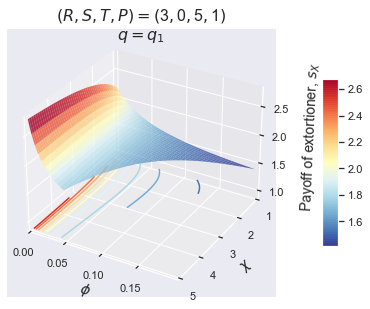

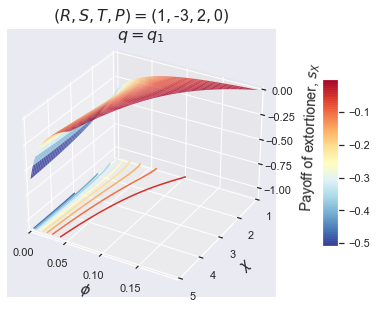

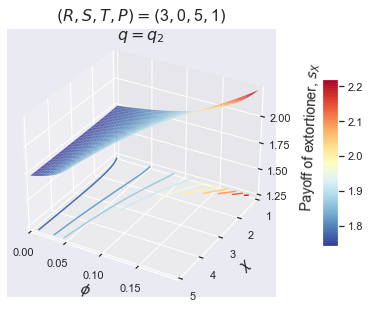

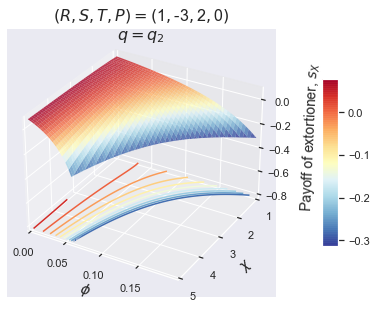

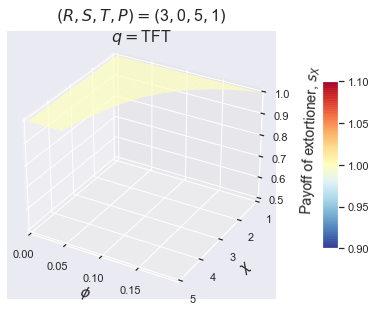

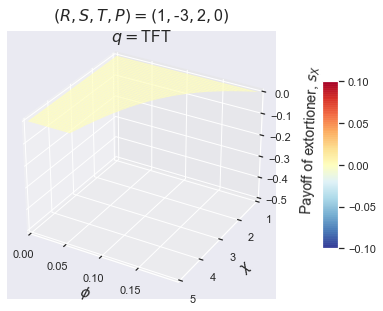

In [9]:
q_subs_list = [q_subs_1, q_subs_2]
for i, q_subs in enumerate(q_subs_list):
    # conventioanl IPD game with T + S > 2P
    s_X_3D(s_X_ext, payoff_con_subs, phi_upper_con, q_subs, 'RdYlBu_r', (5.5, 5), 16, i + 1) 
    # general IPD game with T + S < 2P
    s_X_3D(s_X_ext, payoff_abn_subs, phi_upper_abn, q_subs, 'RdYlBu_r', (5.5, 5), 16, i + 1) 
s_X_3D(s_X_ext, payoff_con_subs, phi_upper_con, TitForTat_q, 'RdYlBu_r', (5.5, 5), 16, 'TFT')
s_X_3D(s_X_ext, payoff_abn_subs, phi_upper_abn, TitForTat_q, 'RdYlBu_r', (5.5, 5), 16, 'TFT')

## Figure 3 (original Figure 2)

> Revealing strategies that are unbending to extortioners in Iterated Prisoner’s Dilemma games.

In [10]:
def unbending_region_A(s_X_gen, s_X_ext, payoff_subs, q_subs, name, fsize = (8, 8), ms = 20, fs = 20):
    '''
    Region of unbending strategies from Class A
    s_X_gen: payoff of player X for a general O
    s_X_ext: payoff of player X for O = P
    payoff_subs: values of the four payoffs R, S, T, and P
    q_subs: strategy used by player Y (an example from Class A or Class C)
    name: name of the strategy used by player Y
    fsize: figure size
    ms: marker size (for the example)
    fs: font size
    '''
    num, deno = fraction(factor(diff(s_X_ext, chi)))
    target  = cancel(num/((T - S)*(R - P)*q_4))
    target = collect(target, chi)
    e_2 = collect(target.coeff(chi, 2), q_4)
    e_1 = collect(target.coeff(chi, 1), q_4)
    e_0 = collect(target.coeff(chi, 0), q_4)
    if (2*payoff_subs[3][1] <= payoff_subs[2][1] + payoff_subs[1][1]): # 2P <= T + S
        f = lambdify([q_2], solve(e_2, q_4)[0].subs(payoff_subs), 'numpy')
        k = 0
    else:
        f = lambdify([q_2], solve(e_2 + e_1 + e_0, q_4)[0].subs(payoff_subs), 'numpy')
        k = 3
    
    fig = plt.figure(figsize = fsize)
    ax = fig.add_subplot(111)
    fig.patch.set_facecolor('white')
    if (2*payoff_subs[3][1] <= payoff_subs[2][1] + payoff_subs[1][1]):
        q_2_temp = (T + S - 2*P)*(P - S)/((T - P)*(T - S) - (P - S)**2)
        q_2_temp = float(q_2_temp.subs(payoff_subs))
        x = np.linspace(q_2_temp, 1, 101)
        y = f(x)
        y = np.where(y > 1, 1, y) # replace with 1 
        ax.plot(x, y, color = colors[k], linewidth = 3, alpha = 0.8, label = r'$O = P$')
        ax.fill_between(x, y, color = colors[k], alpha = 0.1)
    elif (2*payoff_subs[3][1] > payoff_subs[2][1] + payoff_subs[1][1]):
        q_2_temp = ((R - P) + (2*R - T - S))/(2*R - P - S)
        q_2_temp = float(q_2_temp.subs(payoff_subs))
        x_head = np.linspace(0, q_2_temp, 101)
        x_tail = np.linspace(q_2_temp, 1, 101)
        y_head = np.full(x_head.shape, 1)
        y_tail = f(x_tail)
        x = np.concatenate((x_head, x_tail))
        y = np.concatenate((y_head, y_tail))
        ax.plot(x, y, color = colors[k], linewidth = 3, alpha = 0.8, label = r'$O = P$')
        ax.fill_between(x, y, color = colors[k], alpha = 0.1)
        # where s_X < s_Y is possible 
        q_2_temp = (2*P - T - S)/(P - S) 
        q_2_temp = float(q_2_temp.subs(payoff_subs))
        x_head = np.linspace(0, q_2_temp, 101)
        y_head = np.full(x_head.shape, 1)
        ax.fill_between(x_head, y_head, hatch = '/', color = colors[k], edgecolor = colors[k], linewidth = 3, alpha = 0.2)
        
    # letting O = P + e
    e = 5e-2
    points = []
    ppoints = [] # boundary points
    target = factor(fraction(factor(diff(s_X_gen.subs(O, P + epsilon), chi)))[0]/(T - S)/(R - P - epsilon))
    target = factor(target.subs(payoff_subs))
    e_2, e_1, e_0 = [lambdify([q_2, q_4], collect(target.coeff(chi, i), q_4).subs(epsilon, e), 'numpy') for i in [2, 1, 0]]
    for x in np.linspace(0, 1, 501):
        for y in np.linspace(0, 1, 1001):
            e_2_temp, e_1_temp, e_0_temp = e_2(x, y), e_1(x, y), e_0(x, y)
            vertex = -e_1_temp/(2*e_2_temp)
            rule_1 = (e_2_temp == 0) & (e_1_temp == 0) & (e_0_temp < 0)
            rule_2 = (e_2_temp == 0) & (e_1_temp < 0) & (e_1_temp + e_0_temp <= 0)
            rule_3 = (e_2_temp < 0) & (e_2_temp + e_1_temp + e_0_temp <= 0)
            rule_3a = rule_3 & (vertex <= 1) 
            rule_3b = rule_3 & (vertex > 1) & (e_2_temp*vertex**2 + e_1_temp*vertex + e_0_temp < 0)
            if (rule_1) | (rule_2) | (rule_3a) | (rule_3b):
                points.append([x, y])
            else:
                break
        ppoints.append([x, y])
       
    x, y = [p[0] for p in ppoints], [p[1] for p in ppoints] # boundary curve
    ax.plot(x, y, color = colors[k], linewidth = 3, linestyle = '--', alpha = 0.8, 
            label = r'$O = P + \epsilon$', zorder = 100) 
    ax.fill_between(x, y, color = colors[k], alpha = 0.1)
    plt.plot(q_subs[1][1], q_subs[3][1], c = colors[k], marker = '.', markersize = ms, alpha = 0.8)
    plt.text(q_subs[1][1] + 0.15, q_subs[3][1] - 0.075, name, size = fs - 4, horizontalalignment = 'center')
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlabel(r'$q_2$', fontsize = fs - 2)
    ax.set_ylabel(r'$q_4$', fontsize = fs - 2) 
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs - 4)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs - 4)
    plt.legend(ncol = 1, loc = 'upper right', fancybox = True, fontsize = fs - 4).set_zorder(200)
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    plt.title(r'$(R, S, T, P) = ($' + title + r'$)$', fontsize = fs)
    if 2*payoff_subs[3][1] < payoff_subs[1][1] + payoff_subs[2][1]:
        plt.savefig(_Figure_PATH_ + "region_A_con.png", dpi = 400, bbox_inches = 'tight')
    elif 2*payoff_subs[3][1] > payoff_subs[1][1] + payoff_subs[2][1]:
        plt.savefig(_Figure_PATH_ + "region_A_abn.png", dpi = 400, bbox_inches = 'tight')
    plt.show() 

In [11]:
s_XA_gen = cancel(s_X_gen.subs([(q_1, 1), (q_3, 0)]))
s_XA_ext = collect(cancel(s_X_ext.subs([(q_1, 1), (q_3, 0)])), chi)

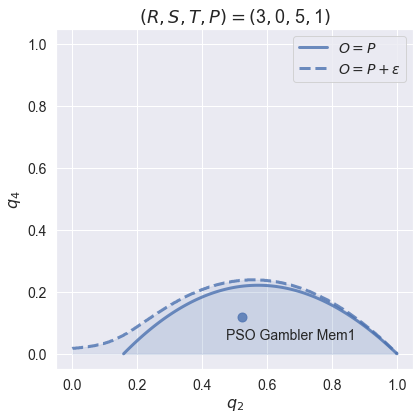

In [12]:
# conventioanl IPD game with T + S > 2P
unbending_region_A(s_XA_gen, s_XA_ext, payoff_con_subs, PSOGamblerMem1_q, 
                   name = 'PSO Gambler Mem1', fsize = (6, 6), ms = 18, fs = 18)

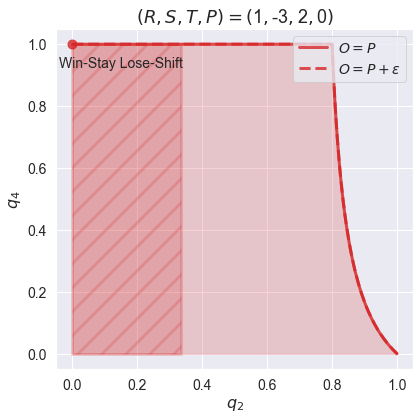

In [13]:
# general IPD game with T + S < 2P
unbending_region_A(s_XA_gen, s_XA_ext, payoff_abn_subs, WinStayLoseShift_q, 
                   name = 'Win-Stay Lose-Shift', fsize = (6, 6), ms = 18, fs = 18)

In [14]:
def unbending_region_A_con(s_X_gen, s_X_ext, payoff_subs, fsize = (8, 8), ms = 100, fs = 16):
    '''
    Region of unbending strategies from class D: T + S > 2P
    s_X_gen: payoff of player X for a general O
    s_X_ext: payoff of player X for O = P
    payoff_subs: values of the four payoffs R, S, T, and P
    fsize: figure size
    ms: marker size
    fs: font size
    '''
    num, deno = fraction(factor(diff(s_X_ext, chi)))
    target = factor(num/(T - S))
    d_D0, a_D0 = factor_list(target)[1][0][0], factor_list(target)[0]*factor_list(target)[1][1][0]
    A = [1, 0, 1]
    B = [2*(T - R)/(T - S), 0, 1]
    C = [1, (2*R - T - S)/(R - S), 1]
    D = [1, 1, 0]
    E = [(T - R)/(T - P), 0, (P - S)/(T - P)]
    B = [float(B[0].subs(payoff_subs)), B[1], B[2]]
    C = [1, float(C[1].subs(payoff_subs)), C[2]]
    E = [float(E[0].subs(payoff_subs)), E[1], float(E[2].subs(payoff_subs))]
    # letting O = P + e
    e = 5e-1
    plane = factor(factor(fraction(factor(diff(s_X_gen, chi)))[0]/(T - S)/-d_D0).subs(O, P + epsilon))
    alpha_sub = solve(plane.subs([(q_1, alpha*E[0] + (1 - alpha)*B[0]), (q_2, alpha*E[1] + (1 - alpha)*B[1]), 
                                  (q_3, alpha*E[2] + (1 - alpha)*B[2])]), alpha)[0]
    F = [factor((alpha*E[i] + (1 - alpha)*B[i]).subs(alpha, alpha_sub)) for i in range(3)]
    F = [float(F[i].subs(payoff_subs).subs(epsilon, e)) for i in range(3)]
    fig = plt.figure(figsize = fsize)
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection = '3d')
    # OUR ONE LINER ADDED HERE: (aspect ratio)
    ax.get_proj = lambda: np.dot(axes3d.Axes3D.get_proj(ax), np.diag([0.9, 0.9, 1.2, 1])) 
    # draw cube
    r = [0, 1]
    X, Y = np.meshgrid(r, r)
    one = np.ones(4).reshape(2, 2)
    zero = np.zeros(4).reshape(2, 2)
    for triple in [(X, Y, zero), (X, Y, one), (X, zero, Y), (X, one, Y), (one, X, Y), (zero, X, Y)]:
        ax.plot_surface(triple[0], triple[1], triple[2], color = colors[0], alpha = 0.05)
    # draw surfaces: EZD (ADE), GZD (ACD), Equalizer (BCDE), ZD with O = P + e (ADF)
    k_list = [1, 2, 0, 1]
    for i, polygon in enumerate([(A, D, E), (A, C, D), (B, C, D, E), (A, D, F)]):
        x = np.array([item[0] for item in polygon])
        y = np.array([item[1] for item in polygon])
        z = np.array([item[2] for item in polygon])
        ax.scatter(x, y, z, color = colors[k_list[i]], alpha = 0)
        # 1. create vertices from points
        verts = [list(zip(x, y, z))]
        # 2. create 3d polygons and specify parameters
        srf = art3d.Poly3DCollection(verts, alpha = 0.3, facecolor = colors[k_list[i]], edgecolor = 'none')
        # 3. add polygon to the figure (current axes)
        plt.gca().add_collection3d(srf)
    
    # draw lines
    for pair in [(A, B), (A, C), (B, C), (A, D), (C, D), (A, E), (B, E), (D, E)]:
        ax.plot(np.linspace(pair[0][0], pair[1][0], 101), np.linspace(pair[0][1], pair[1][1], 101), np.linspace(pair[0][2], pair[1][2], 101), 
                linewidth = 3, color = 'white', alpha = 0.8, zorder = 50)
    for pair in [(A, F), (D, F)]:
        ax.plot(np.linspace(pair[0][0], pair[1][0], 101), np.linspace(pair[0][1], pair[1][1], 101), np.linspace(pair[0][2], pair[1][2], 101), 
                linewidth = 3, linestyle = ':', color = 'white', alpha = 0.8, zorder = 50)
    
    # draw points
    names = ['A', 'B', 'C', 'D', 'E', 'F']
    for i, point in enumerate([A, B, C, D, E, F]):
        ax.scatter([point[0]], [point[1]], [point[2]], color = 'white', s = ms, alpha = 1, zorder = 100)
        ax.text(point[0], point[1], point[2], names[i], size = fs - 2, color = 'black', zorder = 200) 
    
    patch_ADE = mpatches.Patch(color = colors[1], alpha = 0.3, label = 'ADE: ' + r'$O = P$')
    patch_ADF = mpatches.Patch(color = colors[1], alpha = 0.3, label = 'ADF: ' + r'$O = P + \varepsilon$')
    plt.legend(handles = [patch_ADE, patch_ADF], 
               loc = 'upper left', bbox_to_anchor = (0, 0.9), fancybox = True, fontsize = fs - 6).set_zorder(100)
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    ax.set_title(r'$(R, S, T, P) = ($' + title + r'$)$', fontsize = fs, y = 1.05)
    
    ax.set_xlim3d(0, 1)
    ax.set_xlabel(r'$q_1$', fontsize = fs - 2)
    ax.set_ylim3d(0, 1)
    ax.set_ylabel(r'$q_2$', fontsize = fs - 2)
    ax.set_zlim3d(0, 1)
    ax.set_zlabel(r'$q_3$', fontsize = fs - 2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.1)
    ax.spines['left'].set_linewidth(0.1)
    
    plt.savefig(_Figure_PATH_ + "region_D_con.png", dpi = 400, transparent = True, bbox_inches = 'tight')   

In [15]:
num, deno = fraction(factor(s_X_gen.subs(phi, 1/((T - O)*chi + (O - S))) - s_X_gen.subs(phi, 1/((T - O)*chi + (O - S))/2)))
# target: a chi-free term * a linear function of chi
target = factor(num/((T - S)*chi*(T*chi - O*chi + O - S)))
factor_1 = factor_list(target)[1][1][0] # a linear function of chi
factor_0 = factor_list(target)[1][0][0]*factor_list(target)[0] # a chi-free term, Solution D
h_D = collect(collect(collect(solve(factor_0, q_4)[0], q_3), q_2), q_1)
s_XD_ext = cancel(s_X_ext.subs(q_4, h_D))
s_XD_gen = cancel(s_X_gen.subs(q_4, h_D))

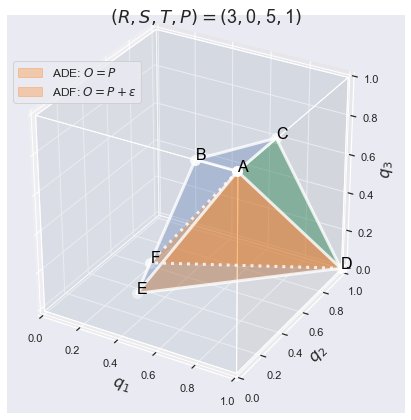

In [16]:
unbending_region_A_con(s_XD_gen, s_XD_ext, payoff_con_subs, fsize = (6, 6), ms = 100, fs = 18)

In [17]:
def unbending_region_A_abn(s_X_gen, s_X_ext, payoff_subs, fsize = (8, 8), ms = 100, fs = 16):
    '''
    Region of unbending strategies from class D: T + S < 2P
    s_X_gen: payoff of player X for a general O
    s_X_ext: payoff of player X for O = P
    payoff_subs: values of the four payoffs R, S, T, and P
    fsize: figure size
    ms: marker size
    fs: font size
    '''
    num, deno = fraction(factor(diff(s_X_ext, chi)))
    target = factor(num/(T - S))
    d_D0, a_D0 = factor_list(target)[1][0][0], factor_list(target)[0]*factor_list(target)[1][1][0]
    
    A = [1, 0, 1]
    B = [(2*P - R - S)/(P - S), (2*P - T - S)/(P - S), 1]
    C = [1, (2*R - T - S)/(R - S), 1]
    D = [1, 1, 0]
    B = [float(B[0].subs(payoff_subs)), float(B[1].subs(payoff_subs)), B[2]]
    C = [1, float(C[1].subs(payoff_subs)), C[2]]
    
    # letting O = P + e
    e = 5e-1
    plane = factor(factor(fraction(factor(diff(s_X_gen, chi)))[0]/(T - S)/-d_D0).subs(O, P + epsilon))
    alpha_sub = solve(plane.subs([(q_1, alpha*B[0] + (1 - alpha)*C[0]), (q_2, alpha*B[1] + (1 - alpha)*C[1]), 
                (q_3, alpha*B[2] + (1 - alpha)*C[2])]), alpha)[0]
    F = [factor((alpha*B[i] + (1 - alpha)*C[i]).subs(alpha, alpha_sub)) for i in range(3)]
    F = [float(F[i].subs(payoff_subs).subs(epsilon, e)) for i in range(3)]

    fig = plt.figure(figsize = fsize)
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection = '3d')
    # OUR ONE LINER ADDED HERE:
    ax.get_proj = lambda: np.dot(axes3d.Axes3D.get_proj(ax), np.diag([0.9, 0.9, 1.2, 1]))
    
    # draw cube
    r = [0, 1]
    X, Y = np.meshgrid(r, r)
    one = np.ones(4).reshape(2, 2)
    zero = np.zeros(4).reshape(2, 2)
    for triple in [(X, Y, zero), (X, Y, one), (X, zero, Y), (X, one, Y), (one, X, Y), (zero, X, Y)]:
        ax.plot_surface(triple[0], triple[1], triple[2], color = colors[0], alpha = 0.05)
    # draw surfaces: EZD (ABD), GZD (ACD), Equalizer (BCD), ZD with O = P + e (ADF)
    k_list = [1, 2, 0, 1]
    for i, polygon in enumerate([(A, B, D), (A, C, D), (B, C, D), (A, D, F)]):
        x = np.array([item[0] for item in polygon])
        y = np.array([item[1] for item in polygon])
        z = np.array([item[2] for item in polygon])
        ax.scatter(x, y, z, color = colors[k_list[i]], alpha = 0)
        # 1. create vertices from points
        verts = [list(zip(x, y, z))]
        # 2. create 3d polygons and specify parameters
        srf = art3d.Poly3DCollection(verts, alpha = 0.3, facecolor = colors[k_list[i]], edgecolor = 'none')
        # 3. add polygon to the figure (current axes)
        plt.gca().add_collection3d(srf)
    
    # draw lines
    for pair in [(A, B), (A, C), (B, C), (A, D), (B, D), (C, D)]:
        #if pair == (B, D):
            #ax.plot(np.linspace(pair[0][0], pair[1][0], 101), np.linspace(pair[0][1], pair[1][1], 101), np.linspace(pair[0][2], pair[1][2], 101), 
                    #linestyle = ':', linewidth = 3, color = 'white', alpha = 0.8, zorder = 50)
        #else:   
        ax.plot(np.linspace(pair[0][0], pair[1][0], 101), np.linspace(pair[0][1], pair[1][1], 101), np.linspace(pair[0][2], pair[1][2], 101), 
                linewidth = 3, color = 'white', alpha = 0.8, zorder = 50)
    for pair in [(A, F), (D, F)]:
        ax.plot(np.linspace(pair[0][0], pair[1][0], 101), np.linspace(pair[0][1], pair[1][1], 101), np.linspace(pair[0][2], pair[1][2], 101), 
                linewidth = 3, linestyle = ':', color = 'white', alpha = 0.8, zorder = 50)
        
    # draw points
    names = ['A', 'B', 'C', 'D', 'F']
    for i, point in enumerate([A, B, C, D, F]):
        ax.scatter([point[0]], [point[1]], [point[2]], color = 'white', s = ms, alpha = 1, zorder = 100)
        ax.text(point[0], point[1], point[2], names[i], size = fs - 2, color = 'black', zorder = 200) 
    
    patch_ADE = mpatches.Patch(color = colors[1], alpha = 0.3, label = 'ADB: ' + r'$O = P$')
    patch_ADF = mpatches.Patch(color = colors[1], alpha = 0.3, label = 'ADF: ' + r'$O = P + \varepsilon$')
    plt.legend(handles = [patch_ADE, patch_ADF], 
               loc = 'upper left', bbox_to_anchor = (0, 0.9), fancybox = True, fontsize = fs - 6).set_zorder(100)
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    ax.set_title(r'$(R, S, T, P) = ($' + title + r'$)$', fontsize = fs, y = 1.05)
    ax.set_xlim3d(0, 1)
    ax.set_xlabel(r'$q_1$', fontsize = fs - 2)
    ax.set_ylim3d(0, 1)
    ax.set_ylabel(r'$q_2$', fontsize = fs - 2)
    ax.set_zlim3d(0, 1)
    ax.set_zlabel(r'$q_3$', fontsize = fs - 2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.1)
    ax.spines['left'].set_linewidth(0.1)
    plt.savefig(_Figure_PATH_ + "region_D_abn.png", dpi = 400, transparent = True, bbox_inches = 'tight')

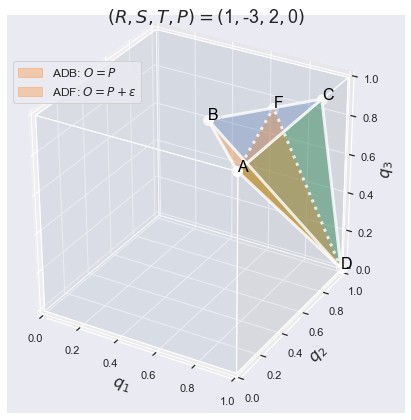

In [18]:
unbending_region_A_abn(s_XD_gen, s_XD_ext, payoff_abn_subs, fsize = (6, 6), ms = 100, fs = 18)

## Figure 4

> Intuition for how unfair demand can backfire on extortioners. 

In [19]:
def s_XY(s_X, s_Y, payoff_subs, q_subs, name, fsize = (8, 6), fs = 18, ms = 10):
    '''
    Curves of s_X and s_Y with respect to chi
    s_X: payoff of player X
    s_Y: payoff of player Y
    payoff_subs: values of the four payoffs R, S, T, and P
    q_subs: strategy used by player Y
    name: name of the strategy used by player Y
    fsize: figure size
    fs: font size
    ms: marker size
    '''
    s_X = simplify(s_X.subs(payoff_subs))
    s_Y = simplify(s_Y.subs(payoff_subs))
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    color_dict = {'ZD Gen2': 0, 'Win-Stay Lose-Shift': 3}
    chi_list = np.linspace(1, 5, 101)
    s_X_temp = cancel(simplify(s_X.subs(q_subs)))
    s_X_list = [s_X_temp.subs(chi, chi_value) for chi_value in chi_list]
    ax.plot(chi_list, s_X_list, color = colors[color_dict[name]], linewidth = 3, label = 'Extortionate ZD ' + r'$s_X$')
    s_Y_temp = cancel(simplify(s_Y.subs(q_subs)))
    s_Y_list = [s_Y_temp.subs(chi, chi_value) for chi_value in chi_list]
    dict_label_y = {'ZD Gen2': 'Generous ZD ', 'Win-Stay Lose-Shift': 'WSLS '}
    ax.plot(chi_list, s_Y_list, color = colors[color_dict[name]], linewidth = 3, linestyle = '--',  
            label = dict_label_y[name] + r'$s_Y$')
    
    dict_label = {'ZD Gen2': r'$R$', 'Win-Stay Lose-Shift': r'$\frac{T + P + S}{3}$'}
    ax.plot(chi_list, [s_X_list[0]]*len(chi_list), color = colors[7], linewidth = 3, linestyle = '--', label = dict_label[name])
    
    ax.set_xlabel('Extortion factor, ' + r'$\chi$', fontsize = fs - 2)
    ax.set_ylabel('Payoff', fontsize = fs - 2)
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs - 6)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs - 6)
    plt.legend(loc = 'upper right',  fancybox = True, fontsize = fs - 6)
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    plt.title(r'$(R, S, T, P) = ($' + title + r'$)$' + '\n' + r'$q = $' + name, fontsize = fs)
    
    # place insets in the corners of the axes
    axins = inset_locator.inset_axes(ax, width = "30%", height = "40%", loc = 4, borderpad = 2) 
    axins.tick_params(labelleft = False, labelbottom = False)
    rr, ss = payoff_subs[0][1], payoff_subs[1][1]
    tt, pp = payoff_subs[2][1], payoff_subs[3][1]
    if 2*pp < tt + ss:
        plt.xlim(pp - 0.4, rr + 0.5)        
        plt.ylim(pp - 0.4, rr + 0.5)
        plt.text(pp + 0.05, pp - 0.25, r'$(P, P)$', fontsize = fs - 8)
        plt.text(rr + 0.05, rr + 0.05, r'$(R, R)$', fontsize = fs - 8)
    elif 2*pp > tt + ss:
        plt.xlim(pp - 0.65, pp + 0.2)        
        plt.ylim(pp - 0.65, pp + 0.2)
        plt.text(pp - 0.15, pp - 0.15, r'$(P, P)$', fontsize = fs - 8)
    lwins = 2
    # the quadrilateral
    points = [[ss, tt], [rr, rr], [tt, ss], [pp, pp]]
    polygon = plt.Polygon(points, color = colors[2], ec = None, alpha = 0.2)
    axins.add_patch(polygon)
    # the line pointing from (R, R) to (P, P)
    line_0 = plt.Line2D((rr, pp), (rr, pp), c = colors[2], lw = lwins, ls = '--', marker = '.', 
                         markersize = ms)
    axins.add_line(line_0)
    # the payoffs when chi = 1 and chi = infty
    plt.plot(s_X_list[0], s_Y_list[0], c = colors[color_dict[name]], marker = '.', markersize = ms)
    plt.plot(s_X_list[-1], s_Y_list[-1], c = colors[color_dict[name]], marker = '.', markersize = ms)
    plt.plot(s_X_list, s_Y_list, c = colors[color_dict[name]], lw = lwins)
    # add the arrow
    # arrow style
    arrow_kw = dict(arrowstyle = '-|>', linewidth = lwins, mutation_scale = 20)
    a = mpatches.FancyArrowPatch((float(s_X_list[-10]), float(s_Y_list[-10])), 
                                 (float((s_X_list[-1])), float(s_Y_list[-1])), 
                                 **arrow_kw, color = colors[color_dict[name]])
    axins.add_patch(a)
    
    
    if 2*pp < tt + ss:
        plt.savefig(_Figure_PATH_ + 'payoff_con.png', dpi = 400, 
                    facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    elif 2*pp > tt + ss:
        plt.savefig(_Figure_PATH_ + 'payoff_abn.png', dpi = 400, 
                    facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    plt.show()

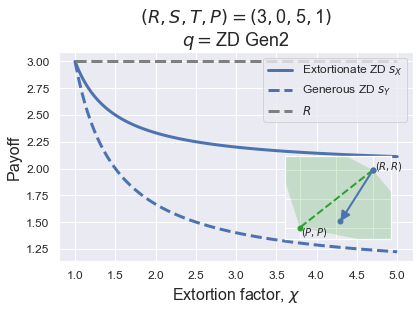

In [20]:
# conventioanl IPD game with T + S > 2P
s_XY(s_X_ext, s_Y_ext, payoff_con_subs, ZDGEN2_q, 'ZD Gen2', fsize = (6, 4.5), fs = 18, ms = 10)

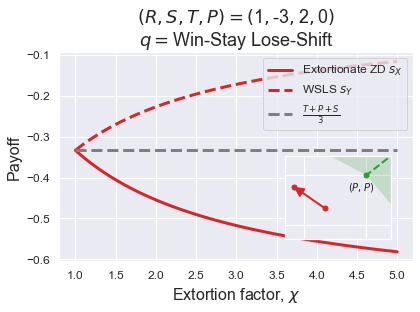

In [21]:
# general IPD game with T + S < 2P
s_XY(s_X_ext, s_Y_ext, payoff_abn_subs, WinStayLoseShift_q, 'Win-Stay Lose-Shift', fsize = (6, 4.5), fs = 18)

## Figure 5

> Steering learning dynamics towards fairness and cooperation with unbending strategies.

In [22]:
def s_X_stream(s_X, ratio, q_subs, cmap = 'viridis', d = 0.25, asize = 2, ms = 25, fsize = (6, 6), fs = 18, tag = 'A'):
    '''
    Stream plot of the partial derivatives of s_X wrt p_1 and p_2
    s_X: payoff of player X
    ratio: benefit-cost ratio
    q_subs: values of the four probabilities q_1, q_2, q_3, q_4 (strategy used by player Y)
    cmap: color map
    d: density
    asize: arrow size
    ms: marker size
    fsize: figure size
    fs: font size
    tag: naming of the plot
    '''
    s_X = factor(s_X.subs([(b, ratio), (c, 1)]).subs(q_subs))
    error = 1e-10
    x = np.linspace(error, 1 - error, 250)
    y = np.linspace(error, 1 - error, 250)
    X, Y = np.meshgrid(x, y)
    lam_diff_1 = lambdify([p_1, p_2], diff(s_X, p_1))
    lam_diff_2 = lambdify([p_1, p_2], diff(s_X, p_2))
    U = lam_diff_1(X, Y)
    V = lam_diff_2(X, Y)
    # vary the color along a streamline: the color at point (p_1, p_2) corresponds to the payoff of player X
    lam_s_X = lambdify([p_1, p_2], s_X)
    SS = lam_s_X(X, Y)
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    fig.patch.set_facecolor('white')
    # color code
    k = 0 
    cs = cm.get_cmap(cmap)
    def cs_color(p_1_sub, p_2_sub): # the color at point (p_1, p_2) corresponds to the payoff of player X 
        return cs((lam_s_X(p_1_sub, p_2_sub) - np.min(SS))/(np.max(SS) - np.min(SS)))
    # line width
    lw = 4
    # arrow style
    arrow_kw = dict(arrowstyle = '-|>', linewidth = lw, mutation_scale = 10*asize)

    # the points (p_1, p_2)
    A = [1, 0] # equal payoff
    B = [1/ratio, 0] # extortioner [c/b, 0]
    C = [1, 1 - 1/ratio] # complier [1, 1 - c/b]

    # draw the triangle
    points = [A, B, C]
    triangle = plt.Polygon(points, color = colors[k], ec = None, alpha = 0.1)
    ax.add_patch(triangle)
    
    # draw the lines: Extortioner (AB), Complier (AC), Equalizer (BC)
    k_list = [1, 2, 0]
    angle_list = [0, 90, 45]
    name_list = ['extortioner', 'complier', 'equalizer']
    for i, line in enumerate([(A, B), (A, C), (B, C)]):
        if ratio >= 10:
            plt.text((line[0][0] + line[1][0])/2 - 0.07, (line[0][1] + line[1][1])/2 + 0.03, name_list[i], 
                     color = colors[k_list[i]], rotation = angle_list[i], fontsize = (fs - 2))
    # draw the lines or arrows
    ps = np.linspace(B[0] + 0.01, A[0] - 0.01, 21) # from B to A
    for i, x in enumerate(ps[:-1]):
        if i % 4 == 1:
            a_right = mpatches.FancyArrowPatch((x, 0), (ps[i + 1] + 0.01, 0), 
                                               **arrow_kw, color = cs_color(x, 0))
            ax.add_patch(a_right)
            
        line_right = plt.Line2D((x, ps[i + 1]), (0, 0), c = cs_color(x, 0), lw = lw, alpha = 1, zorder = 100)
        ax.add_line(line_right)
            
    # from A to C
    # for Class D (not a general ZD)
    if tag == 'D':
        ps = np.linspace(A[1] + 0.01, C[1] - 0.01, 21)
        for i, x in enumerate(ps[:-1]):
            if i % 4 == 1:
                a_top = mpatches.FancyArrowPatch((1, x), (1, ps[i + 1] + 0.01), 
                                                 **arrow_kw, color = cs_color(1, x))
                ax.add_patch(a_top)
            line_top = plt.Line2D((1, 1), (x, ps[i + 1]), c = cs_color(1, x), lw = lw, alpha = 1, zorder = 100)
            ax.add_line(line_top)          
    else:
        ps = np.linspace(A[1] + 0.01, C[1] - 0.01, 21)
        for i, x in enumerate(ps[:-1]):
            line_temp = plt.Line2D((1, 1), (x, ps[i + 1]), c = cs_color(1, x), lw = lw, alpha = 1)
            ax.add_line(line_temp)
    
    # draw the points
    plt.plot(A[0], A[1], c = cs_color(A[0], A[1]), marker = '.', markersize = ms, zorder = 200)
    plt.plot(B[0], B[1], c = cs_color(B[0], B[1]), marker = '.', markersize = ms, zorder = 200)
    plt.plot(C[0], C[1], c = cs_color(C[0], C[1]), marker = '.', markersize = ms, zorder = 200)
    
    # add texts
    plt.text(A[0] + 0.03, A[1] - 0.03, 'A', fontsize = fs - 4)
    plt.text(B[0] - 0.06, B[1] - 0.03, 'B', fontsize = fs - 4)
    plt.text(C[0] + 0.03, C[1] + 0.03, 'C', fontsize = fs - 4)
    
    # draw the stream lines
    stream = ax.streamplot(X, Y, U, V, color = SS, cmap = cmap, density = d, arrowsize = asize, linewidth = lw)
    
    # draw the transition point (line) \partial s_X/ \partial p_1 |_(p_1, 0) = 0
    k = np.argmax(U[0, :] >= 0) # first occurrence of derivative greater than or equal to 0
    if k > 0:
        ps = np.linspace(1, 0, 20)
        for i, x in enumerate(ps[:-1]):
            line_temp = plt.Line2D((X[0][k], X[0][k]), (x, ps[i + 1]), 
                                   c = cs_color(X[0][k], x), lw = lw, ls = ':', alpha = 1)
            ax.add_line(line_temp)
        plt.plot(X[0][k], 0, c = cs_color(X[0][k], 0), marker = '.', markersize = ms)
        
    # draw the maximum value point
    i, j = np.unravel_index(SS.argmax(), SS.shape)
    plt.plot(X[i][j], Y[i][j], c = cs(0.999), marker = '.', markersize = ms)
    
    title = [q_subs[0][1], q_subs[1][1], q_subs[2][1], q_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    plt.title(r'$b/c = $' + str(ratio) + '    ' + r'$q = ($' + title + r'$)$', 
              fontsize = fs)
    # create an axes on the right side of ax (cax)
    # width of cax: 5% of ax; padding between cax and ax: fixed at 0.2 inch
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size = "5%", pad = 0.2)
    fig.colorbar(stream.lines, cax = cax)
    
    ax.set_aspect('equal', adjustable = 'box')
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlabel(r'$p_1$', fontsize = fs - 2)
    ax.set_ylabel(r'$p_2$', fontsize = fs - 2)
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs - 4)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs - 4)
    
    plt.savefig(_Figure_PATH_ + 'payoff_stream_' + str(ratio).replace('.', '_') + '_' + tag + '.png', 
                dpi = 400, bbox_inches = 'tight')
    
    fig.show()

In [23]:
s_XA_re = cancel(s_X_re.subs([(q_1, 1), (q_3, 0)]))
# benefit-cost ratio = 4
ratio = 4
# \max(s_X) = b - c, \partial s_X/ \partial p_1 |_(0, 0) < 0
q_subs_A_re_A = [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.2)] 
# \max(s_X) = b - c, \partial s_X/ \partial p_1 |_(0, 0) > 0
q_subs_A_re_a = [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.1)]
tag_list = ['A', 'aaa']

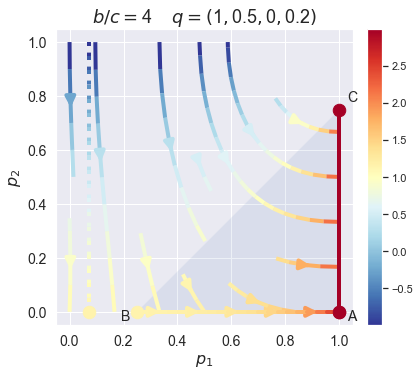

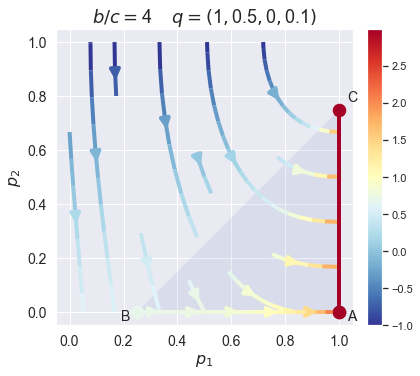

In [24]:
for i, q_subs in enumerate([q_subs_A_re_A, q_subs_A_re_a]):   
    s_X_stream(s_XA_re, ratio, q_subs, cmap = 'RdYlBu_r', tag = tag_list[i])

In [25]:
h_D_re = factor(h_D.subs(payoff_dg_subs))
s_XD_re = cancel(s_X_re.subs([(q_4, h_D_re)]))

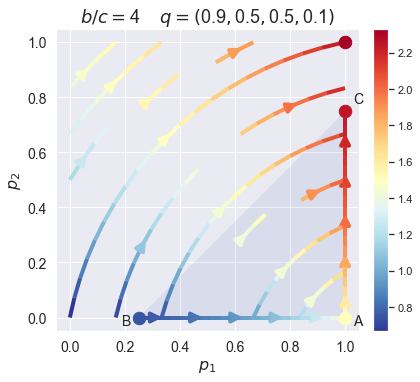

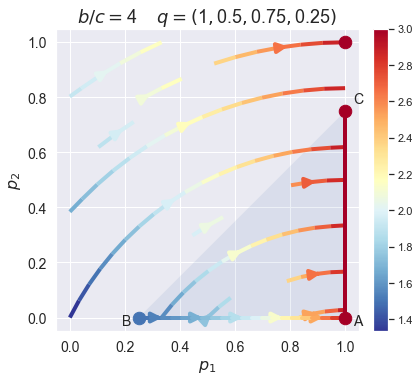

In [26]:
# benefit-cost ratio = 4
ratio = 4
q_subs_D_re = [(q_1, 0.9), (q_2, 0.5), (q_3, 0.5), (q_4, 0.1)]
s_X_stream(s_XD_re, ratio, q_subs_D_re, cmap = 'RdYlBu_r', tag = 'D')
q_subs_D_re = [(q_1, 1), (q_2, 0.5), (q_3, 0.75), (q_4, 0.25)] 
s_X_stream(s_XD_re, ratio, q_subs_D_re, cmap = 'RdYlBu_r', tag = 'D_gen')

# Rebuttal Letter

## Double-edged sword effect

In [27]:
def s_XY_sword(s_X, s_Y, payoff_subs, chi_sub = 2, q_subs = Random_q, bending = True, fsize = (8, 8), ms = 20, fs = 20):
    '''
    Quadrilateral visualization of the payoffs s_X and s_Y
    s_X: payoff of player X
    s_Y: payoff of player Y
    payoff_subs: values of the four payoffs R, S, T, and P
    chi_sub: value of the extortion factor chi
    q_subs: values of the four probabilities q_1, q_2, q_3, and q_4 (strategy used by player Y)
    bending: True (player Y is subdued) or False (player Y pushes back)
    fsize: figure size
    ms: marker size
    fs: font size
    '''
    # use a different color scheme
    prop_cycle = plt.rcParams['axes.prop_cycle'] 
    colors = prop_cycle.by_key()['color']
    s_X_temp = cancel(s_X.subs(chi, chi_sub).subs(payoff_subs + q_subs)); s_X_temp = np.float(s_X_temp)
    s_Y_temp = cancel(s_Y.subs(chi, chi_sub).subs(payoff_subs + q_subs)); s_Y_temp = np.float(s_Y_temp)
    rr, ss = payoff_subs[0][1], payoff_subs[1][1]
    tt, pp = payoff_subs[2][1], payoff_subs[3][1]
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    fig.patch.set_facecolor('white')
    k = 2 # color code
    
    # the points
    plt.plot(ss, tt, c = colors[k], marker = '.', markersize = ms)
    plt.plot(tt, ss, c = colors[k], marker = '.', markersize = ms)
    plt.plot((rr + pp)/2, (rr + pp)/2, c = colors[k], marker = '.', markersize = ms)
    plt.text(ss + 0.5, tt - 0.2, r'$(S, T)$', fontsize = fs - 4)
    plt.text(tt - 1, ss, r'$(T, S)$', fontsize = fs - 4)
    plt.text(rr + 0.1, rr + 0.1, r'$(R, R)$', fontsize = fs - 4)
    plt.text(pp - 0.3, pp - 0.3, r'$(P, P)$', fontsize = fs - 4)
    # the quadrilateral
    points = [[ss, tt], [rr, rr], [tt, ss], [pp, pp]]
    polygon = plt.Polygon(points, color = colors[k], ec = None, alpha = 0.2)
    ax.add_patch(polygon)
    # the line pointing from (R, R) to (P, P)
    line_0 = plt.Line2D((rr, pp), (rr, pp), c = colors[k], lw = 2, ls = '--', marker = '.', 
                         markersize = ms, alpha = 1)
    ax.add_line(line_0)
    # the line pointing from (S, T) to (T, S)
    if 2*payoff_subs[3][1] > payoff_subs[1][1] + payoff_subs[2][1]:
        line_1 = plt.Line2D((ss, tt), (tt, ss), c = colors[k], lw = 2, ls = '--', marker = '.', 
                            markersize = ms, alpha = 1)
        ax.add_line(line_1)
    if bending == True:
        k = 0
    else:
        k = 3
    # the point (s_X, s_Y)
    plt.plot(s_X_temp, s_Y_temp, c = colors[k], marker = '.', markersize = ms)
    # the line pointing from (P, P) to (s_X, s_Y), that is, the hypotenuse
    line = plt.Line2D((pp, s_X_temp), (pp, s_Y_temp), c = colors[k], lw = 4, marker = '.', markersize = ms, alpha = 1)
    ax.add_line(line)
    # the horizontal line pointing from (P, P) to (s_X, P), that is, the adjacent side
    line_x = plt.Line2D((pp, s_X_temp), (pp, pp), c = colors[k], lw = 4, ls = '--', marker = '.', markersize = ms, alpha = 1)
    ax.add_line(line_x)
    # the vertical line pointing from (s_X, P) to (s_X, s_Y), that is, the opposite side
    line_y = plt.Line2D((s_X_temp, s_X_temp), (pp, s_Y_temp), c = colors[k], lw = 4, ls = '--', marker = '.', markersize = ms, alpha = 1)
    ax.add_line(line_y)
    # the arrows
    # arrow style
    arrow_kw = dict(arrowstyle = '-|>', linewidth = 4, mutation_scale = 30)
    if bending == True:
        a = mpatches.FancyArrowPatch((0.1*pp + 0.9*s_X_temp, 0.1*pp + 0.9*s_Y_temp), (s_X_temp, s_Y_temp), **arrow_kw, color = colors[k])
        ax.add_patch(a)
        a_x = mpatches.FancyArrowPatch((0.1*pp + 0.9*s_X_temp, pp), (s_X_temp, pp), **arrow_kw, color = colors[k])
        ax.add_patch(a_x)
        a_y = mpatches.FancyArrowPatch((s_X_temp, 0.1*pp + 0.9*s_Y_temp), (s_X_temp, s_Y_temp), **arrow_kw, color = colors[k])
        ax.add_patch(a_y)
    else:
        a = mpatches.FancyArrowPatch((0.9*pp + 0.1*s_X_temp, 0.9*pp + 0.1*s_Y_temp), (pp, pp), **arrow_kw, color = colors[k])
        ax.add_patch(a)
        a_x = mpatches.FancyArrowPatch((0.9*pp + 0.1*s_X_temp, pp), (pp, pp), **arrow_kw, color = colors[k])
        ax.add_patch(a_x)
        a_y = mpatches.FancyArrowPatch((s_X_temp, 0.9*pp + 0.1*s_Y_temp), (s_X_temp, pp), **arrow_kw, color = colors[k])
        ax.add_patch(a_y)
    # the texts
    plt.text(0.8*pp + 0.2*s_X_temp, pp - 0.3, r'$\Delta s_X = \chi\Delta s_Y$', color = colors[k], fontsize = fs)
    plt.text(s_X_temp + 0.15, 0.6*pp + 0.4*s_Y_temp, r'$\Delta s_Y$', color = colors[k], fontsize = fs)
    
    if bending == True:
        plt.text(0.3, 0.9, "Y is subdued by increasing cooperation", fontsize = fs - 4, transform = ax.transAxes)
        plt.text(0.3, 0.85, "X's " + r'$\bf{gain}$' + " in payoff " + r'$\Delta s_X$' + ' is ' + r'$\chi$' + " times Y's " + r'$\Delta s_Y$', 
                 fontsize = fs - 4, transform = ax.transAxes)
    else:
        plt.text(0.3, 0.9, "Y pushes back by decreasing cooperation", fontsize = fs - 4, transform = ax.transAxes)
        plt.text(0.3, 0.85, "X's " + r'$\bf{loss}$' + " in payoff " + r'$\Delta s_X$' + ' is ' + r'$\chi$' + " times Y's " + r'$\Delta s_Y$', 
                 fontsize = fs - 4, transform = ax.transAxes) 
    
    # equalize the scales of x-axis and y-axis
    ax.set_aspect('equal', adjustable = 'box')
    ax.set_xlabel('Payoff of extortioner, ' + r'$s_X$', fontsize = fs - 2)
    ax.set_ylabel('Payoff of coplayer, ' + r'$s_Y$', fontsize = fs - 2)
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs - 4)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs - 4)
    
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = ', '.join(title) 
    #plt.title(r'$(R, S, T, P) = ($' + title + ')' + '\n' + r'$\chi = $' + str(chi_sub), fontsize = fs)
    
    if bending == True:
        plt.savefig(_Figure_PATH_ + 'payoff_sword_bending.png', dpi = 400, 
                    facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    else:
        plt.savefig(_Figure_PATH_ + 'payoff_sword_unbending.png', dpi = 400, 
                    facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    plt.show()

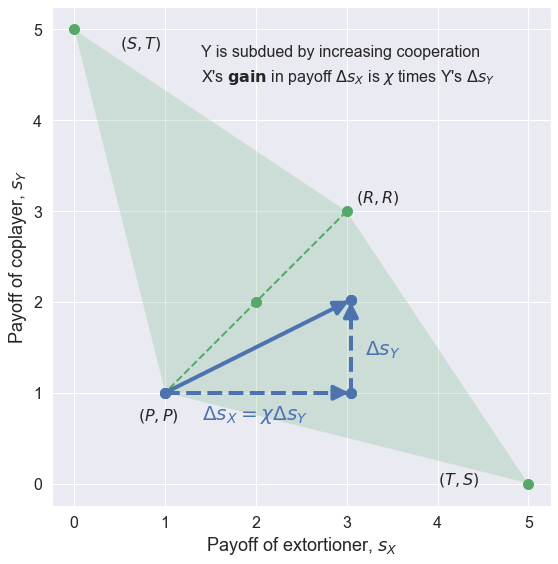

In [28]:
q = 0.75 # level of cooperation
q_subs = [(q_1, q), (q_2, q), (q_3, q), (q_4, q)]
s_XY_sword(s_X_ext, s_Y_ext, payoff_con_subs, chi_sub = 2, q_subs = q_subs, bending = True)

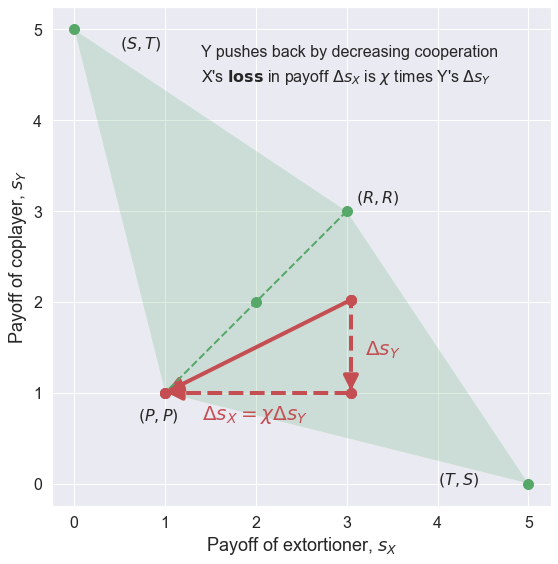

In [29]:
s_XY_sword(s_X_ext, s_Y_ext, payoff_con_subs, chi_sub = 2, q_subs = q_subs, bending = False)